##Assignment 2 - Deep Convolutional Neural Network - Cats vs Dogs

##Name: Sowmya Thokala

##Date : 10 - 24 - 2024

In [1]:
##importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

In [2]:
#Code for activating the JSON File
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejagottam","key":"cf91ad43117fead6599068e051138465"}'}

In [3]:
#creating the folder, copying the .kaggle and giving permissions


!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#downloading dogs-vs-cats dataset
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:12<00:00, 37.8MB/s]
100% 812M/812M [00:12<00:00, 66.6MB/s]


In [5]:
#unzipping the dogs-vs-cats dataset
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [6]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [7]:
#creating directories "training, testing and validation"
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")

new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)


In [15]:

import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)



Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [14]:
# Checking the shape of images in the train_dataset
for images, labels in train_dataset.take(1):
    print(f'Image batch shape: {images.shape}')
    print(f'Label batch shape: {labels.shape}')


Image batch shape: (32, 150, 150, 3)
Label batch shape: (32, 1)


###1) Consider the Cats & Dogs example. Start initially with a training sample of 1000, avalidation sample of 500, and a test sample of 500 (like in the text). Use any techniqueto reduce overfitting and improve performance in developing a network that you trainfrom scratch. What performance did you achieve?

###Model 1

In [16]:
#building model 1 with filters ranging from 32 to 256 by maxpooling operation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#training the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.4881 - loss: 9.4728 - val_accuracy: 0.5000 - val_loss: 0.7962
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5225 - loss: 0.7270 - val_accuracy: 0.5440 - val_loss: 0.6776
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5137 - loss: 0.6945 - val_accuracy: 0.5020 - val_loss: 0.7237
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5440 - loss: 0.6896 - val_accuracy: 0.5200 - val_loss: 0.6861
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6189 - loss: 0.6665 - val_accuracy: 0.5440 - val_loss: 0.6904
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5930 - loss: 0.6640 - val_accuracy: 0.5780 - val_loss: 0.6751
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6217 - loss: 0.6601 - val_accuracy: 0.6020 - val_loss: 0.6737
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6456 - loss: 0.6398 - val_accuracy: 0.5980 - val_loss:

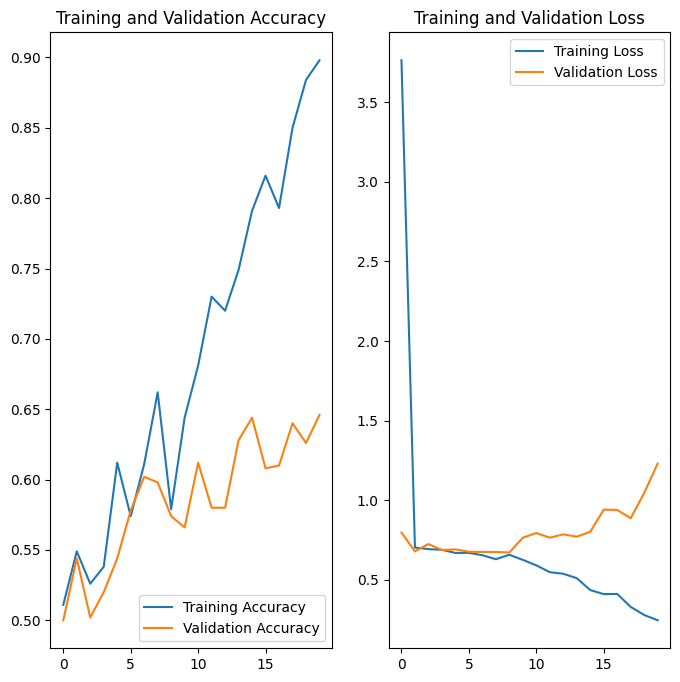

In [18]:
#visualizing results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [20]:
#evaluating model on test set
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")



16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 648ms/step - accuracy: 0.6220 - loss: 1.2481
Test Accuracy: 66.20%
Test Loss: 1.1758


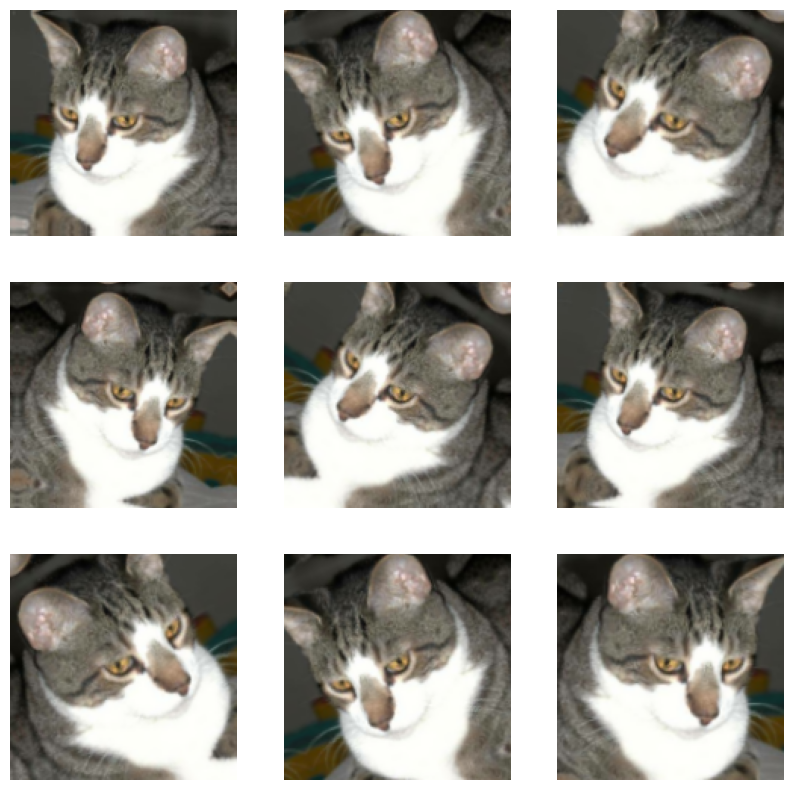

In [ ]:
#avoiding overfitting
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

###Model 2

In [21]:
#building the model 2 with increase in layers from 32 to 512 by maxpooling the operation and considering dropout rate as 0.5

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,763,905 (21.99 MB)

 Trainable params: 5,763,905 (21.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.9442 - loss: 0.1396 - val_accuracy: 0.6600 - val_loss: 1.5565
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.9269 - loss: 0.2149 - val_accuracy: 0.6840 - val_loss: 1.3373
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.9098 - loss: 0.2265 - val_accuracy: 0.6840 - val_loss: 1.1617
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9642 - loss: 0.0964 - val_accuracy: 0.6680 - val_loss: 1.4323
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9692 - loss: 0.0871 - val_accuracy: 0.6720 - val_loss: 1.5252
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.9777 - loss: 0.0686 - val_accuracy: 0.6680 - val_loss: 1.7775
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.9580 - loss: 0.1080 - val_accuracy: 0.6880 - val_loss: 1.5961
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.9530 - loss: 0.1148 - val_accuracy: 0.6720 - val

In [ ]:
#evaluating model on test set
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 765ms/step - accuracy: 0.6446 - loss: 2.4923
Test Accuracy: 66.40%
Test Loss: 2.1314


###after comparing the two models we can clearly see that accuracy of model 2 is greater than the accuracy of model 1.

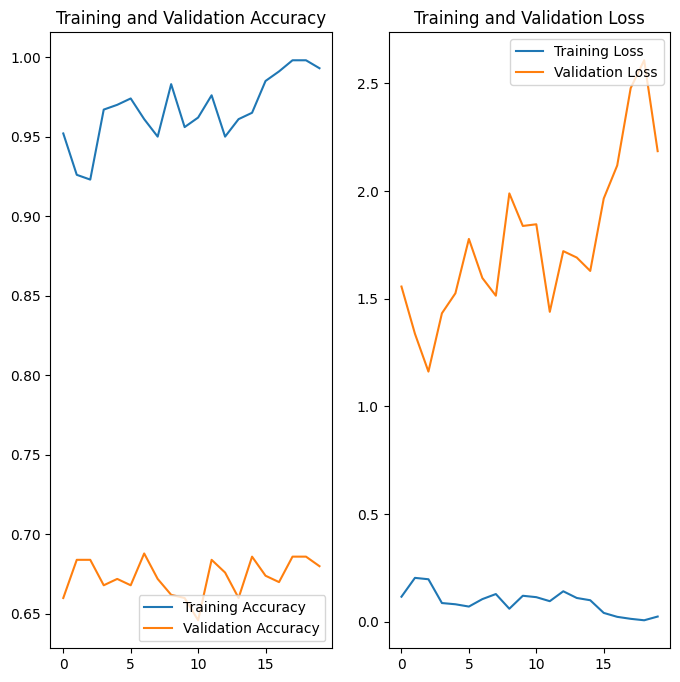

In [ ]:
#visualizing the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



##Model 3

In [ ]:
##building model 3 by maxpooling operations with increase in filters from 32 to 512 and dropout rate as 0.5
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.4895 - loss: 16.8424 - val_accuracy: 0.5000 - val_loss: 0.6871
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.5237 - loss: 0.6886 - val_accuracy: 0.5140 - val_loss: 0.6987
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.5327 - loss: 0.7066 - val_accuracy: 0.5640 - val_loss: 0.6840
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5830 - loss: 0.6783 - val_accuracy: 0.5380 - val_loss: 0.6743
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.5705 - loss: 0.6760 - val_accuracy: 0.5980 - val_loss: 0.6787
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.6165 - loss: 0.6692 - val_accuracy: 0.6020 - val_loss: 0.6674
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.5966 - loss: 0.6577 - val_accuracy: 0.6480 - val_loss: 0.6330
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.6939 - loss: 0.5867 - val_accuracy: 0.6860 - 

In [ ]:
#evaluating the model on test set
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 662ms/step - accuracy: 0.6743 - loss: 1.3628
Test Accuracy: 67.60%
Test Loss: 1.2864


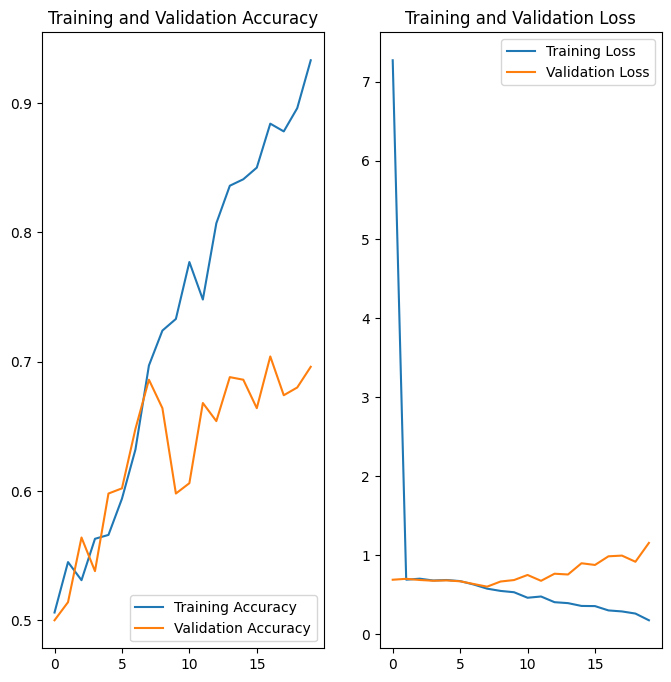

In [ ]:
#visualizing the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


###Model 4

In [ ]:

from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.6))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 9, 9, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,660,225 (55.92 MB)

 Trainable params: 14,660,225 (55.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 326s 10s/step - accuracy: 0.5281 - loss: 94.3153 - val_accuracy: 0.5000 - val_loss: 0.7071
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 378s 10s/step - accuracy: 0.5098 - loss: 0.7052 - val_accuracy: 0.5060 - val_loss: 0.6929
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 333s 10s/step - accuracy: 0.5188 - loss: 0.6948 - val_accuracy: 0.5020 - val_loss: 0.6930
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 374s 10s/step - accuracy: 0.5229 - loss: 0.7010 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 362s 11s/step - accuracy: 0.5143 - loss: 0.6925 - val_accuracy: 0.5020 - val_loss: 0.6944
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 338s 10s/step - accuracy: 0.5045 - loss: 0.6973 - val_accuracy: 0.5560 - val_loss: 0.6851
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 318s 10s/step - accuracy: 0.5382 - loss: 0.6917 - val_accuracy: 0.5020 - val_loss: 0.6846
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 327s 10s/step - accuracy: 0.5124 - loss: 0.6913 - val_accuracy: 0

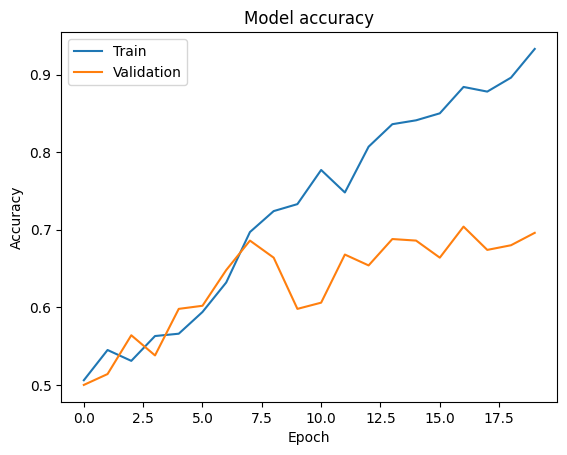

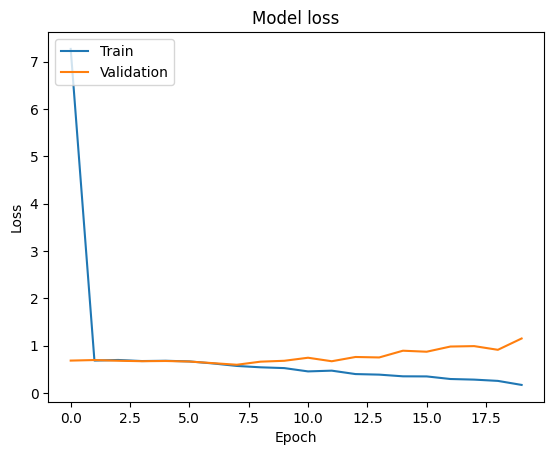

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [32]:
#evaluating model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 621ms/step - accuracy: 0.4777 - loss: 5.0619
Test accuracy: 0.4980
Test loss: 4.8838


###Conclusion: We have built 4 models with the training sample of 1000. let us compare 4 models by comparing accuracy and loss to know which model performed better

In [18]:
Model_1 = (1.2481, 0.6220),
Model_2 = (2.4923, 0.6446)
Model_3 = (1.3628,0.6743)
Model_4 = (5.0619, 0.4777)

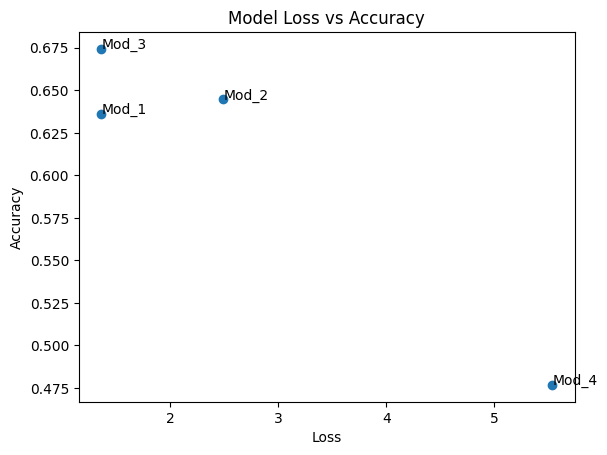

In [20]:
import matplotlib.pyplot as plt

# Model data
Models = ("Mod_1", "Mod_2", "Mod_3", "Mod_4")
Loss = (1.3628, 2.4923, 1.3628, 5.5341)
Accuracy = (0.6362, 0.6446, 0.6743, 0.4768)

# Plotting
fig, ax = plt.subplots()
ax.scatter(Loss, Accuracy)

# Annotate each point with the model name
for i, model_name in enumerate(Models):
    ax.annotate(model_name, (Loss[i], Accuracy[i]))

# Set plot title and labels
plt.title("Model Loss vs Accuracy")
plt.xlabel("Loss")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

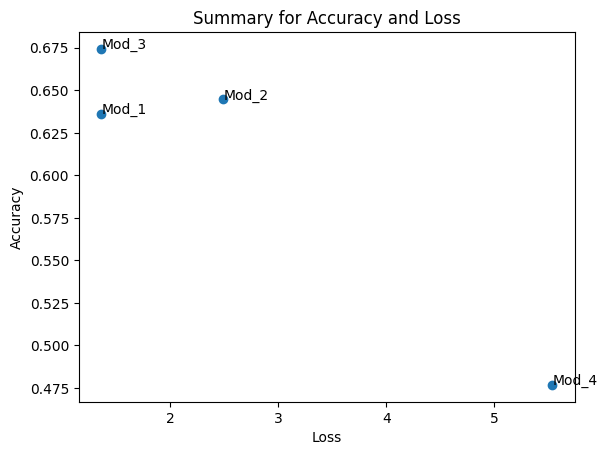

In [21]:
fig, ax = plt.subplots()
ax.scatter(Loss,Accuracy)
for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i],Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

###Conclusion: from the above graph we can say that Model 3 is performing better compared to all the 4 models while Model 4 has the highest loss. so we can choose model 3 which has highest accuracy.

###2)Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?

In [23]:
#considering training sample as 2000
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")

new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)


In [24]:
##data preprocessing

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Data preprocessing
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32
)


Found 5000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [25]:
#viewing the size of the images
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [26]:
##viewing the size of the images

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pathlib

# Data augmentation layer
data_augmentation_1 = models.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.2)
    ]
)



###Model 5

In [27]:

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

# Data augmentation layer
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2)
])

# Model architecture
model = models.Sequential([
    data_augmentation,  # Add data augmentation layer

    # Convolutional layers with increasing filters and MaxPooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layer with dropout
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5614 - loss: 0.7558 - val_accuracy: 0.5680 - val_loss: 0.6670
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5586 - loss: 0.6979 - val_accuracy: 0.5800 - val_loss: 0.6683
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 787ms/step - accuracy: 0.4238 - loss: 0.7777 - val_accuracy: 0.5600 - val_loss: 0.6642
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5467 - loss: 0.7127 - val_accuracy: 0.6180 - val_loss: 0.6544
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5803 - loss: 0.6892 - val_accuracy: 0.5980 - val_loss: 0.6592
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 448ms/step - accuracy: 0.5864 - loss: 0.7527 - val_accuracy: 0.6320 - val_loss: 0.6554
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5594 - loss: 0.7085 - val_accuracy: 0.6500 - val_loss: 0.6407
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5233 - loss: 0.7112 - val_accuracy: 0.5680 - va

In [ ]:
#evaluating the performance of the model on test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 482ms/step - accuracy: 0.6019 - loss: 0.6580
Test accuracy: 0.6159999966621399


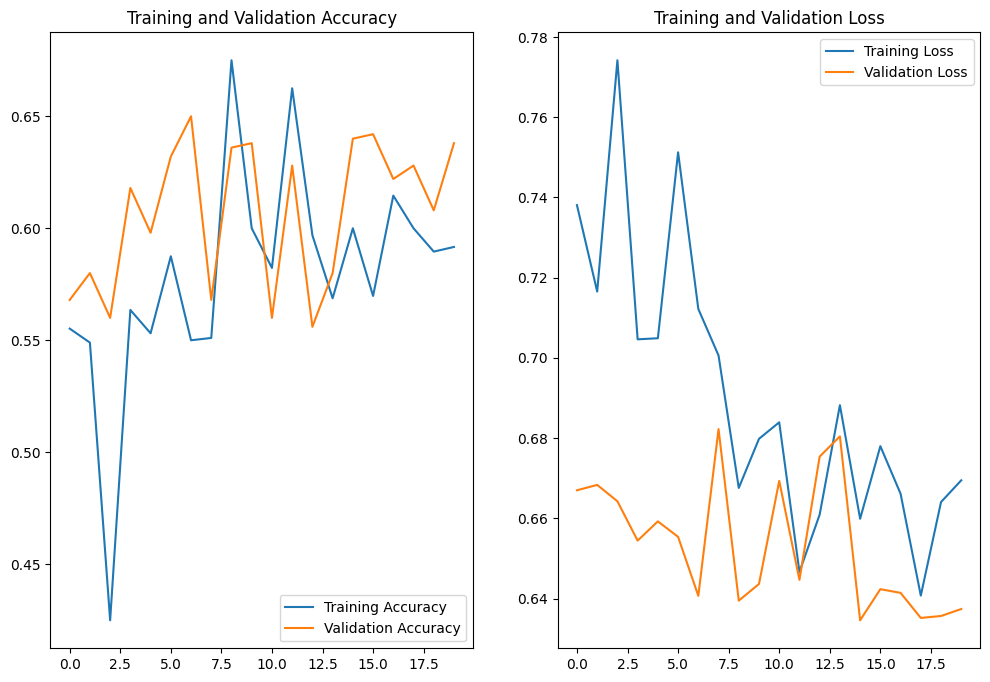

In [ ]:
##visualize the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


###Model 6

In [ ]:
##building the model

import tensorflow as tf
from tensorflow.keras import layers, models


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    data_augmentation,

    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),


    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 23, 23, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,698,113 (21.74 MB)

 Trainable params: 5,698,113 (21.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 184s 6s/step - accuracy: 0.5373 - loss: 0.6928 - val_accuracy: 0.5300 - val_loss: 0.6907
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 173s 6s/step - accuracy: 0.5129 - loss: 0.6991 - val_accuracy: 0.5040 - val_loss: 0.6960
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4948 - loss: 0.7019 - val_accuracy: 0.5100 - val_loss: 0.6892
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - accuracy: 0.5493 - loss: 0.6926 - val_accuracy: 0.5080 - val_loss: 0.6896
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 166s 6s/step - accuracy: 0.5200 - loss: 0.6933 - val_accuracy: 0.5560 - val_loss: 0.6806
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6081 - loss: 0.6834 - val_accuracy: 0.5420 - val_loss: 0.6879
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.5745 - loss: 0.6791 - val_accuracy: 0.5740 - val_loss: 0.6737
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.5957 - loss: 0.6893 - val_accuracy: 0.5860 - val

In [ ]:
#evaluate the model performance
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32,
    label_mode="binary"
)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Found 500 files belonging to 2 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6370 - loss: 0.6624
Test accuracy: 61.20%


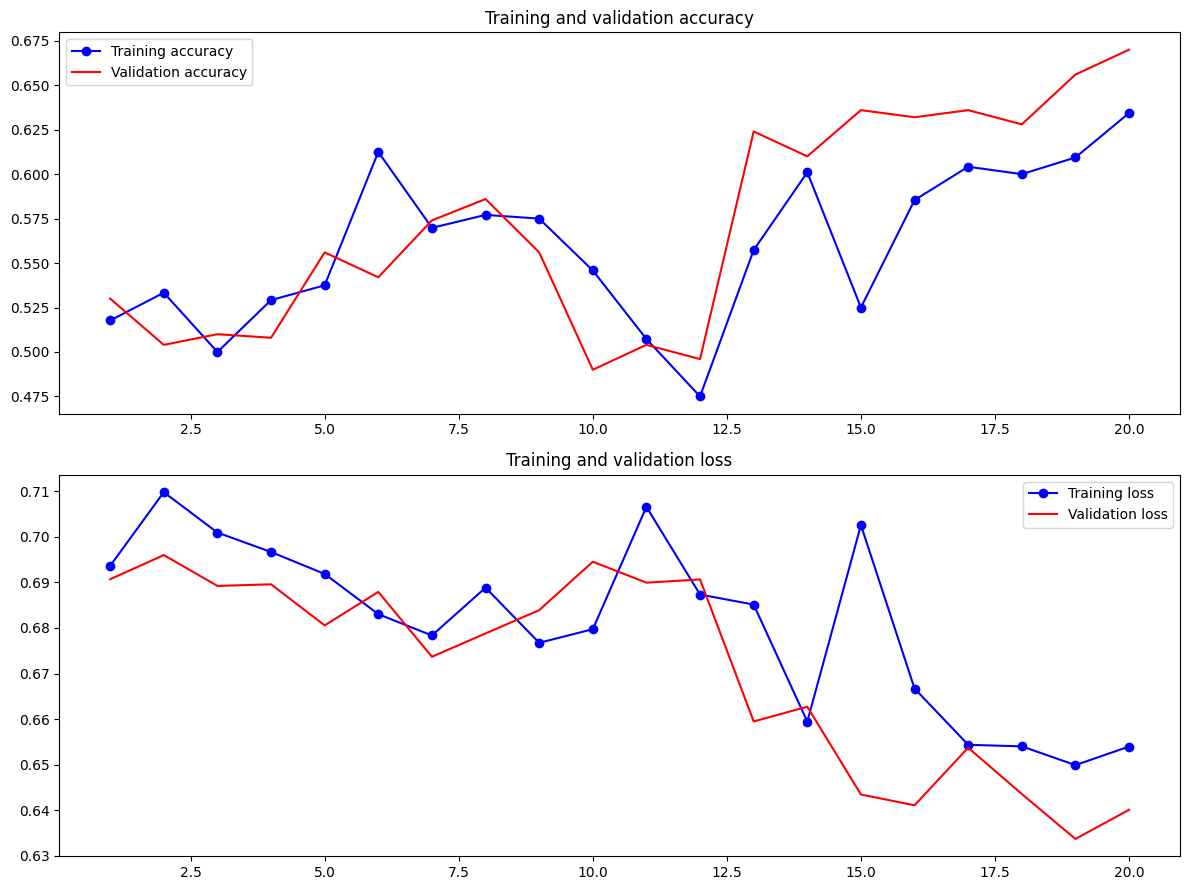

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()
plt.show()


###Conclusion: We have built two more models with increase in filters from 1000 to 2000 and let us ccompare the three models ( Model 2, Model 5 and Model 6) to check which model performed better.

In [35]:
Model_5 = (0.6580,0.6019)
Model_6 = (0.6624,0.6370)
Model_2 = (2.4923,0.6446)


In [36]:
Models_2 = ("Mod_2","Mod_5","Mod_6")
Loss_2 = (Model_2[0],Model_5[0],Model_6[0])
Accuracy_2 = (Model_2[1],Model_5[1],Model_6[1])

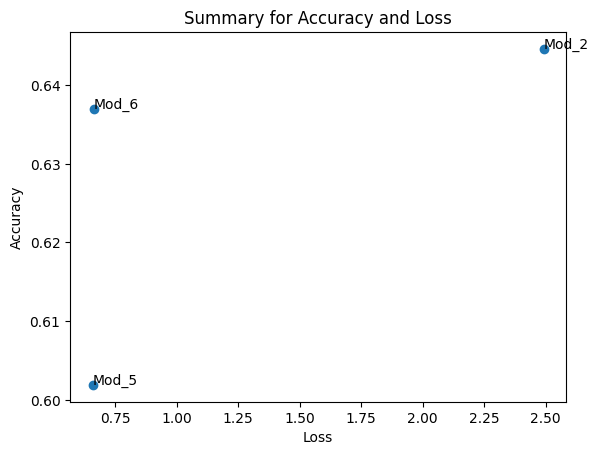

In [37]:
fig, ax = plt.subplots()
ax.scatter(Loss_2,Accuracy_2)
for i, txt in enumerate(Models_2):
    ax.annotate(txt, (Loss_2[i],Accuracy_2[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

###Model_2 has the highest loss (1.0589) and lowest accuracy (0.5384), which indicates it's the least efficient model in terms of performance. Model_6 has the lowest loss (0.6267) and highest accuracy (0.6657), which makes it the best performing model among the three.Model_5 performs better than Model_2 but is slightly behind Model_6, with a loss of 0.6624 and accuracy of 0.6370.

##Based on these results, Model_6 is the best choice as it has the lowest loss and highest accuracy, making it the most optimal model for your task.

##3. Now change your training sample so that you achieve better performance than thosefrom Steps 1 and 2. This sample size may be larger, or smaller than those in the previoussteps. The objective is to find the ideal training sample size to get best predictionresults.


###Considering training sample as 3000

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")

new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=1750)
make_subset("test", start_index=1750, end_index=2000)


In [ ]:
import tensorflow as tf
from pathlib import Path

new_base_dir = Path("cats_vs_dogs_small")

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)


Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
# Viewing the structure of the datasets

for images, labels in train_dataset.take(1):
    print("Shape of image batch:", images.shape)
    print("Shape of label batch:", labels.shape)
    print("Labels in batch:", labels.numpy())


Shape of image batch: (32, 150, 150, 3)
Shape of label batch: (32, 1)
Labels in batch: [[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]


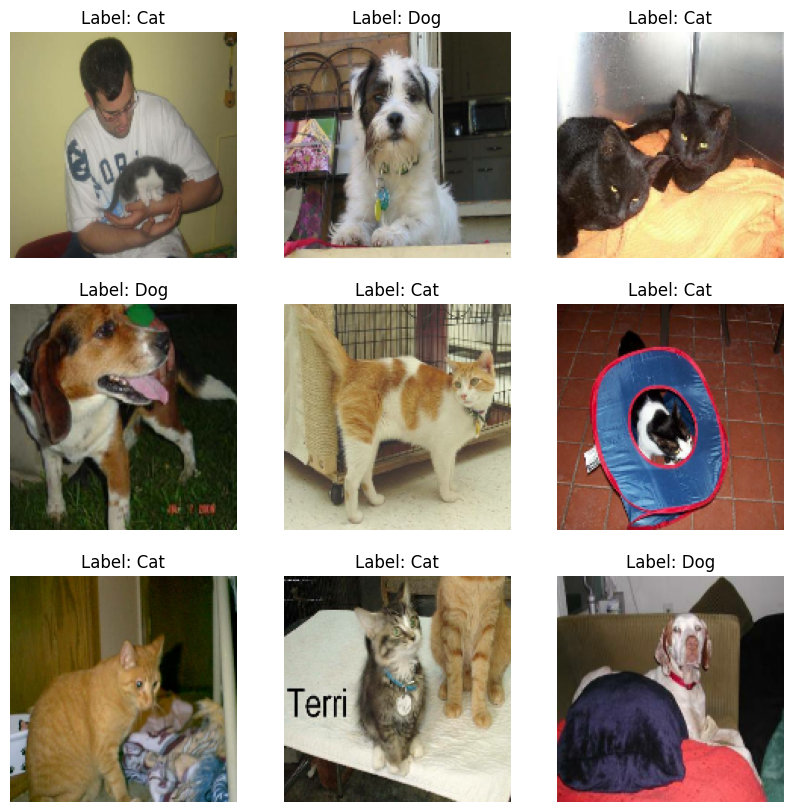

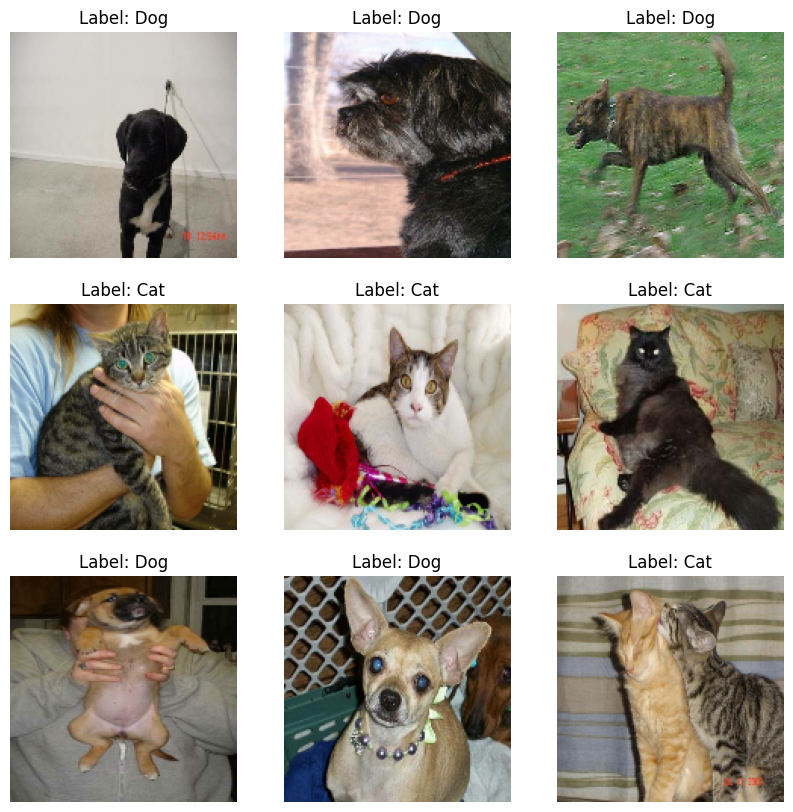

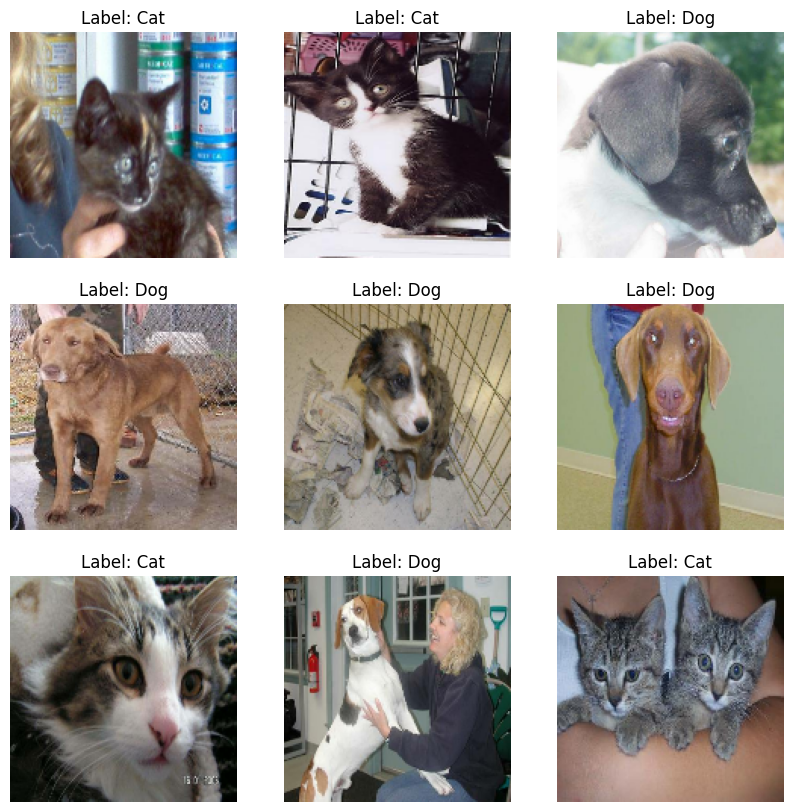

In [ ]:
import matplotlib.pyplot as plt


def display_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title("Label: " + ("Dog" if labels[i] else "Cat"))
            plt.axis("off")


display_images(train_dataset)

display_images(validation_dataset)

display_images(test_dataset)


###Model 7

In [ ]:

##building the model

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training hte model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.4759 - loss: 4.8014 - val_accuracy: 0.5760 - val_loss: 0.6878
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5112 - loss: 0.6956 - val_accuracy: 0.5880 - val_loss: 0.6827
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5736 - loss: 0.6827 - val_accuracy: 0.6060 - val_loss: 0.6672
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.5699 - loss: 0.6684 - val_accuracy: 0.5540 - val_loss: 0.6744
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5946 - loss: 0.6715 - val_accuracy: 0.6100 - val_loss: 0.6589
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6108 - loss: 0.6511 - val_accuracy: 0.6300 - val_loss: 0.6473
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6686 - loss: 0.6164 - val_accuracy: 0.6140 - val_loss: 0.6530
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6313 - loss: 0.6491 - val_accuracy: 0.6580 - val_loss:

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, steps=50)
print(f"Test accuracy: {test_acc:.3f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.5933 - loss: 0.7854
Test accuracy: 0.590


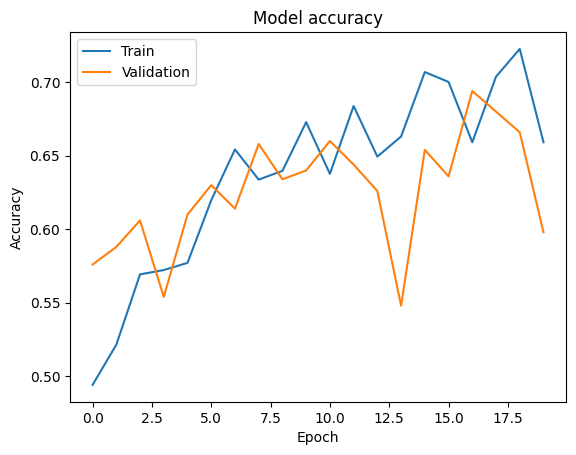

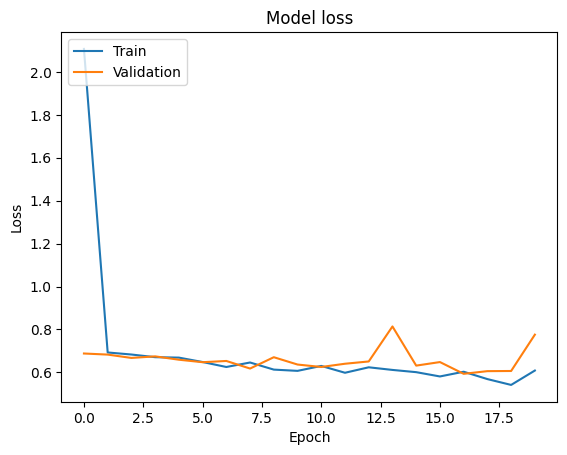

In [ ]:
#visualizing the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


###Model 8

In [ ]:

#building a model by combining maxpooling and strides with increase in filters from 32 to 256 in 5 inputlayers and dropout rate 0.5 with a training sample 3000.
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)



Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.5254 - loss: 6.9046 - val_accuracy: 0.5370 - val_loss: 0.6924
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5349 - loss: 0.6890 - val_accuracy: 0.5270 - val_loss: 0.6896
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5291 - loss: 0.6953 - val_accuracy: 0.5340 - val_loss: 0.6846
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.5660 - loss: 0.6876 - val_accuracy: 0.5870 - val_loss: 0.6779
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6045 - loss: 0.6690 - val_accuracy: 0.5770 - val_loss: 0.6713
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6121 - loss: 0.6685 - val_accuracy: 0.6160 - val_loss: 0.6646
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.5986 - loss: 0.6732 - val_accuracy: 0.5900 - val_loss: 0.6717
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6302 - loss: 0.6501 - val_accuracy: 0.6150 - val_loss

In [ ]:
#evaluate the model performance
test_loss, test_acc = model.evaluate(test_dataset, steps=50)  # 500 test samples / batch size of 32 = ~50 steps
print(f"Test accuracy: {test_acc:.3f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 351ms/step - accuracy: 0.6424 - loss: 0.7041
Test accuracy: 0.642


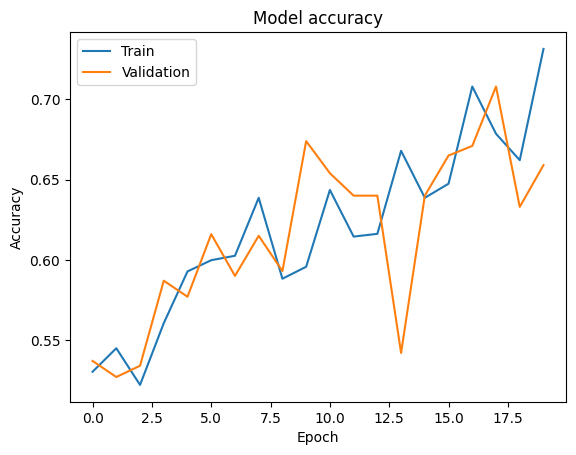

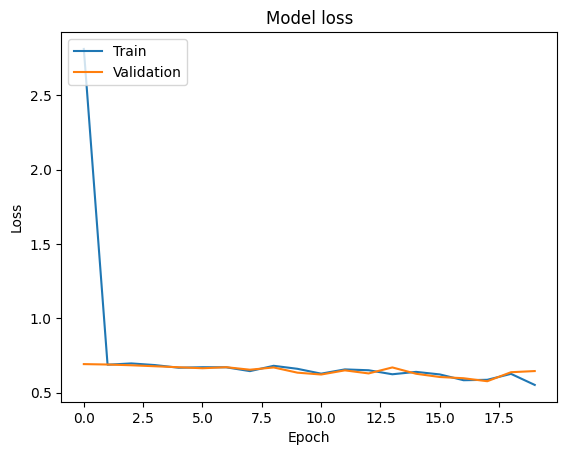

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
##model 9
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(512, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 75, 75, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 19, 19, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,831,745 (6.99 MB)

 Trainable params: 1,831,745 (6.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 540ms/step - accuracy: 0.4940 - loss: 1.5270 - val_accuracy: 0.5030 - val_loss: 0.6909
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.5605 - loss: 0.6875 - val_accuracy: 0.5270 - val_loss: 0.6801
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.6178 - loss: 0.6660 - val_accuracy: 0.6100 - val_loss: 0.6554
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.5633 - loss: 0.6746 - val_accuracy: 0.6180 - val_loss: 0.6468
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 457ms/step - accuracy: 0.5915 - loss: 0.6668 - val_accuracy: 0.6210 - val_loss: 0.6505
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 0.5780 - loss: 0.6761 - val_accuracy: 0.6280 - val_loss: 0.6516
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 707ms/step - accuracy: 0.6353 - loss: 0.6418 - val_accuracy: 0.5990 - val_loss: 0.6665
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 718ms/step - accuracy: 0.6329 - loss: 0.6391 - val_accu

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, steps=50)
print(f"Test accuracy: {test_acc:.3f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6509 - loss: 0.8129
Test accuracy: 0.647


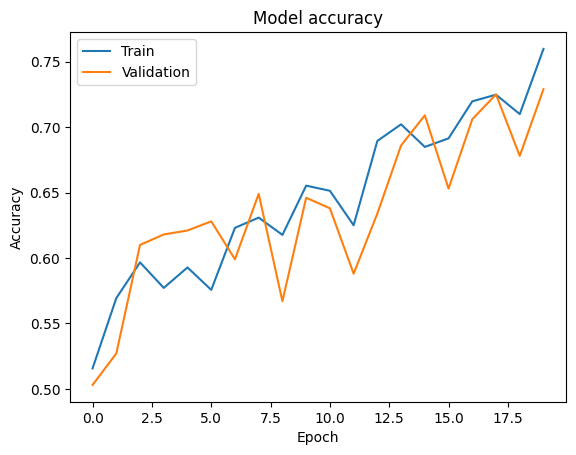

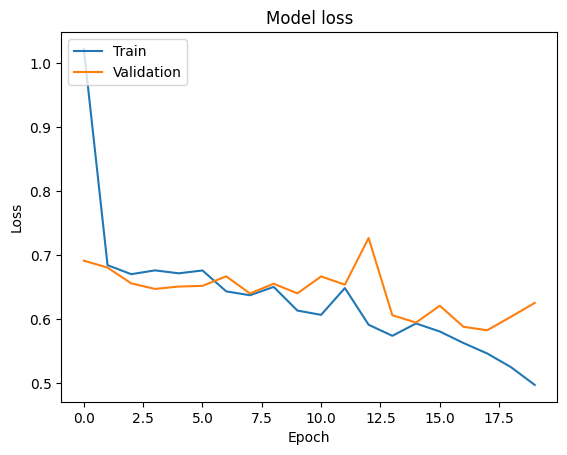

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


####Now let us compare model 7, 8 and 9 where the training sample being set to 3000

In [38]:
Model_7 = (0.7854,0.5933)
Model_8 = (0.7041,0.6424)
Model_9 = (0.8129,0.6509)
Model_6 = (0.6624, 0.6370)

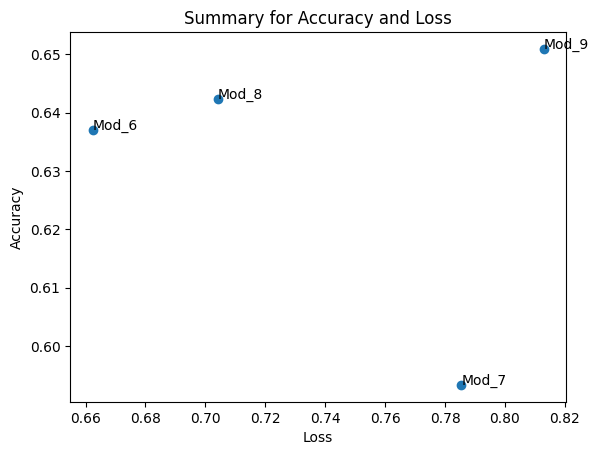

In [39]:
Models_3 = ("Mod_6","Mod_7","Mod_8","Mod_9")
Loss_3 = (Model_6[0],Model_7[0],Model_8[0],Model_9[0])
Accuracy_3 = (Model_6[1],Model_7[1],Model_8[1],Model_9[1])

fig, ax = plt.subplots()
ax.scatter(Loss_3,Accuracy_3)
for i, txt in enumerate(Models_3):
    ax.annotate(txt, (Loss_3[i],Accuracy_3[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

##training sample 5000

In [40]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("/content/train")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [41]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)



Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [42]:

for images, labels in train_dataset.take(1):
    print(f"Training dataset - Images shape: {images.shape}")
    print(f"Training dataset - Labels shape: {labels.shape}")


Training dataset - Images shape: (32, 150, 150, 3)
Training dataset - Labels shape: (32, 1)


In [43]:
##data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])


###Model 10

In [44]:

##building the model
model = models.Sequential()

model.add(layers.Input(shape=(150, 150, 3)))

model.add(data_augmentation)

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=32
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.4724 - loss: 8.1488 - val_accuracy: 0.5020 - val_loss: 0.6862
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.5114 - loss: 0.6984 - val_accuracy: 0.5240 - val_loss: 0.6892
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5229 - loss: 0.6917 - val_accuracy: 0.5540 - val_loss: 0.6776
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5349 - loss: 0.6919 - val_accuracy: 0.5920 - val_loss: 0.6825
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5839 - loss: 0.6842 - val_accuracy: 0.5240 - val_loss: 0.6737
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5691 - loss: 0.6857 - val_accuracy: 0.5020 - val_loss: 0.6847
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5378 - loss: 0.6857 - val_accuracy: 0.6280 - val_loss: 0.6618
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.5862 - loss: 0.6717 - val_accuracy: 0.5140 - val_loss:

In [45]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 597ms/step - accuracy: 0.5137 - loss: 7.3309
Test accuracy: 0.5


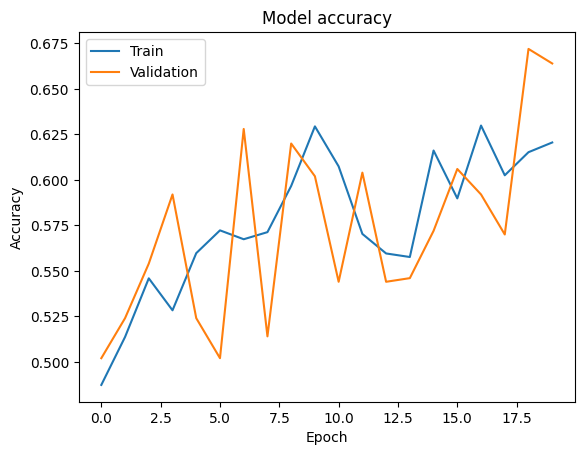

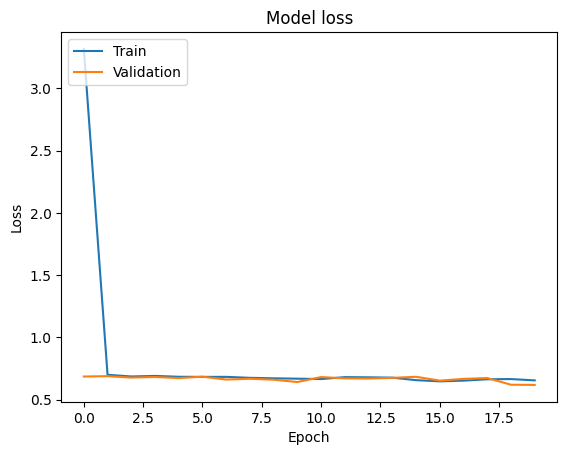

In [ ]:
##visualizing the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


###Conclusion: We have built Model 7, 8 and 9 with the sample size of 3000 whereas model 10 with the sample size 5000. let us compare the accuracy and loss of the four models.

In [15]:
Model_7 = (0.7854,0.5933)
Model_8 = (0.7041,0.6424)
Model_9 = (0.8129,0.6509)
Model_10 = (7.3309, 0.5137)

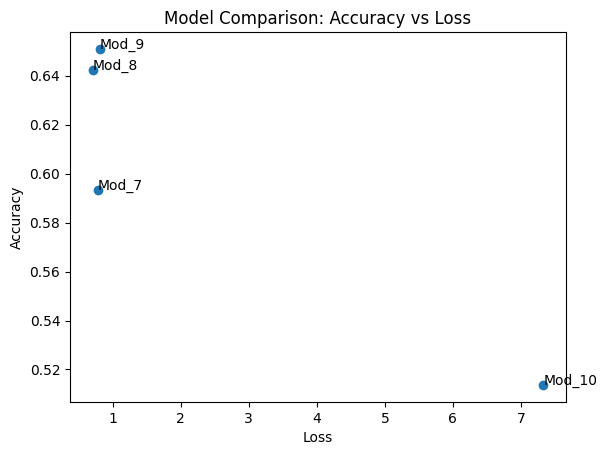

In [16]:
import matplotlib.pyplot as plt

Models_4 = ["Mod_7", "Mod_8", "Mod_9", "Mod_10"]
Loss_4 = [Model_7[0], Model_8[0], Model_9[0], Model_10[0]]
Accuracy_4 = [Model_7[1], Model_8[1], Model_9[1], Model_10[1]]
fig, ax = plt.subplots()
ax.scatter(Loss_4, Accuracy_4)
for i, txt in enumerate(Models_4):
    ax.annotate(txt, (Loss_4[i], Accuracy_4[i]))
plt.title("Model Comparison: Accuracy vs Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

##Scratch the model (Comparing all 10 models)


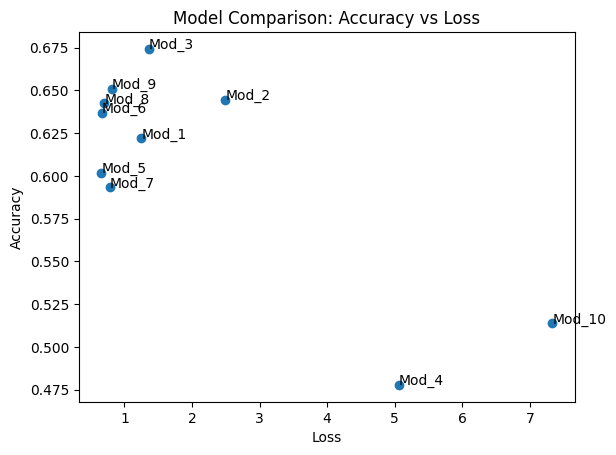

In [17]:
import matplotlib.pyplot as plt

Model_1 = (1.2481, 0.6220)
Model_2 = (2.4923, 0.6446)
Model_3 = (1.3628, 0.6743)
Model_4 = (5.0619, 0.4777)
Model_5 = (0.6580, 0.6019)
Model_6 = (0.6624, 0.6370)
Model_7 = (0.7854, 0.5933)
Model_8 = (0.7041, 0.6424)
Model_9 = (0.8129, 0.6509)
Model_10 = (7.3309, 0.5137)


Models = ["Mod_1", "Mod_2", "Mod_3", "Mod_4", "Mod_5", "Mod_6", "Mod_7", "Mod_8", "Mod_9", "Mod_10"]
Loss = [Model_1[0], Model_2[0], Model_3[0], Model_4[0], Model_5[0], Model_6[0], Model_7[0], Model_8[0], Model_9[0], Model_10[0]]
Accuracy = [Model_1[1], Model_2[1], Model_3[1], Model_4[1], Model_5[1], Model_6[1], Model_7[1], Model_8[1], Model_9[1], Model_10[1]]

fig, ax = plt.subplots()
ax.scatter(Loss, Accuracy)

for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i], Accuracy[i]))

plt.title("Model Comparison: Accuracy vs Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")


plt.show()


###From the scatter plot comparing loss and accuracy for the 10 models, we can draw several insights:

Model 5 has the lowest loss at 0.6580, indicating that its predictions are closer to the true values. Low loss values are typically desirable in a model as they suggest better alignment with actual results. Model 3 has the highest accuracy at 0.6743, showing that it correctly predicted the most samples among the models. However, Model 3 does not have the lowest loss, which may suggest some overfitting or slight misalignment despite high accuracy.Models 4 and 10 have notably high loss values (5.0619 and 7.3309, respectively) and also low accuracies (0.4777 and 0.5137). These models underperform both in accuracy and alignment with true values, indicating potential issues with model complexity, data compatibility, or insufficient tuning.Model 8 offers a good balance, with a relatively low loss (0.7041) and an accuracy of 0.6424, making it one of the more balanced models in the dataset.
Model 6 also performs well in this regard, with a loss of 0.6624 and an accuracy of 0.6370.Best Performing Model: For balanced performance, Model 8 stands out, with reasonable accuracy and low loss.
Room for Improvement: While Model 3 shows the highest accuracy, models such as Model 5 and Model 8 may provide more stable predictions with a lower risk of overfitting, given their lower loss values.
Overall, Model 8 would be preferable for its combination of low loss and respectable accuracy, indicating better generalization across the test data.

##4)Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use inSteps 2 and 3 for the pretrained network may be the same or different from those usingthe network where you trained from scratch. Again, use any and all optimizationtechniques to get best performance.2Write a report summarizing your findings. What is the relationship between training samplesize and choice of network?

##Building the model 1 with training sample 1000

In [49]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Function to create dataset subsets
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Create train, validation, and test sets with 1000, 500, 500 images respectively
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)


In [ ]:
import tensorflow as tf


train_dir = new_base_dir / "/content/cats_vs_dogs_small/train"
validation_dir = new_base_dir / "/content/cats_vs_dogs_small/validation"
test_dir = new_base_dir / "/content/cats_vs_dogs_small/test"


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)


Found 3000 files belonging to 2 classes.
Found 1500 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

conv_base = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=16
)



Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 459s 14s/step - accuracy: 0.8090 - loss: 8.3394 - val_accuracy: 0.8398 - val_loss: 4.6456
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 461s 15s/step - accuracy: 0.8984 - loss: 4.1645 - val_accuracy: 0.9258 - val_loss: 1.9547
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 489s 16s/step - accuracy: 0.9091 - loss: 2.0629 - val_accuracy: 0.9622 - val_loss: 0.6920
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 572s 16s/step - accuracy: 0.9453 - loss: 0.9020 - val_accuracy: 0.9688 - val_loss: 0.6134
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 461s 15s/step - accuracy: 0.9381 - loss: 0.9553 - val_accuracy: 0.9609 - val_loss: 0.6544
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 430s 14s/step - accuracy: 0.9489 - loss: 1.0826 - val_accuracy: 0.9727 - val_loss: 0.1801
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 511s 14s/step - accuracy: 0.9757 - loss: 0.2914 - val_accuracy: 0.9707 - val_loss: 0.3701
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 457s 14s/step - accuracy: 0.9546 - loss: 0.7020 - val_accuracy: 0.

In [11]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 590s 9s/step - accuracy: 0.9722 - loss: 0.2793
Test Accuracy: 97.30%
Test Loss: 0.2322


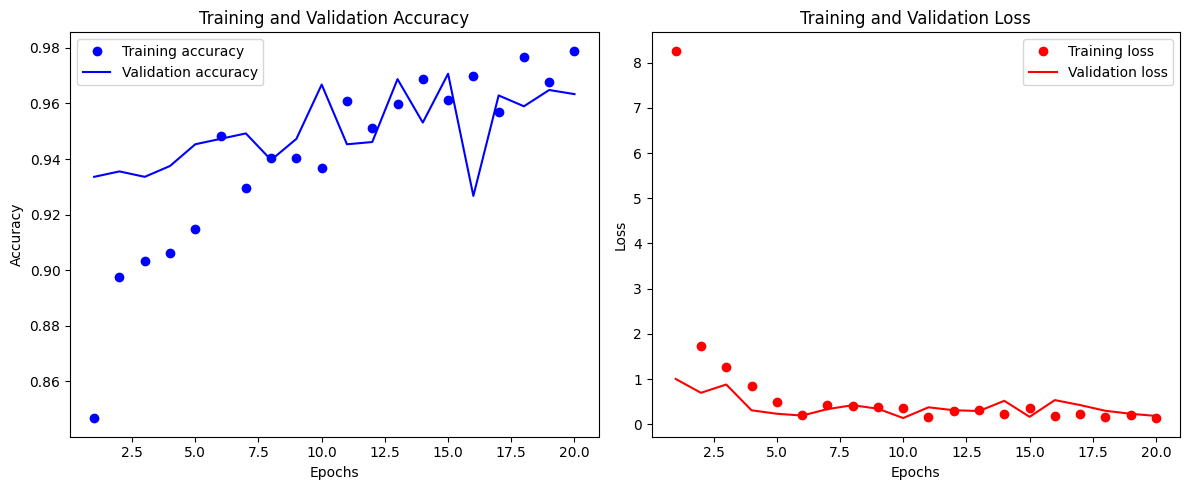

In [12]:
##visualize the model
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')  # Blue dots
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  # Blue line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')  # Red dots
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # Red line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


##VGG model with 5000 training sample

In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Creating subsets for training, validation, and testing
make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=2500, end_index=3000)
make_subset("test", start_index=3000, end_index=3500)


In [3]:
import tensorflow as tf

train_dir = new_base_dir / "/content/cats_vs_dogs_small/train"
validation_dir = new_base_dir / "/content/cats_vs_dogs_small/validation"
test_dir = new_base_dir / "/content/cats_vs_dogs_small/test"


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

Found 5000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [4]:
##building the model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 network, with pre-trained ImageNet weights
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Build the model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [5]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=16
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 461s 14s/step - accuracy: 0.7636 - loss: 20.4718 - val_accuracy: 0.9336 - val_loss: 1.0067
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 448s 14s/step - accuracy: 0.9021 - loss: 1.6099 - val_accuracy: 0.9355 - val_loss: 0.6996
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 442s 14s/step - accuracy: 0.8970 - loss: 1.2638 - val_accuracy: 0.9336 - val_loss: 0.8830
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9139 - loss: 0.7998

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 484s 15s/step - accuracy: 0.9137 - loss: 0.8011 - val_accuracy: 0.9375 - val_loss: 0.3139
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 405s 13s/step - accuracy: 0.9124 - loss: 0.5815 - val_accuracy: 0.9453 - val_loss: 0.2369
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 447s 14s/step - accuracy: 0.9462 - loss: 0.2286 - val_accuracy: 0.9473 - val_loss: 0.1967
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 453s 14s/step - accuracy: 0.9266 - loss: 0.4697 - val_accuracy: 0.9492 - val_loss: 0.3391
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 433s 14s/step - accuracy: 0.9473 - loss: 0.3439 - val_accuracy: 0.9397 - val_loss: 0.4262
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 451s 14s/step - accuracy: 0.9491 - loss: 0.3467 - val_accuracy: 0.9473 - val_loss: 0.3482
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 413s 13s/step - accuracy: 0.9389 - loss: 0.2984 - val_accuracy: 0.9668 - val_loss: 0.1419
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 493s 14s/step - accuracy: 0.9630 - loss: 0.1119 - val_accuracy: 0.9453 - va

In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 604s 10s/step - accuracy: 0.9709 - loss: 0.2256
Test Accuracy: 97.30%
Test Loss: 0.2322


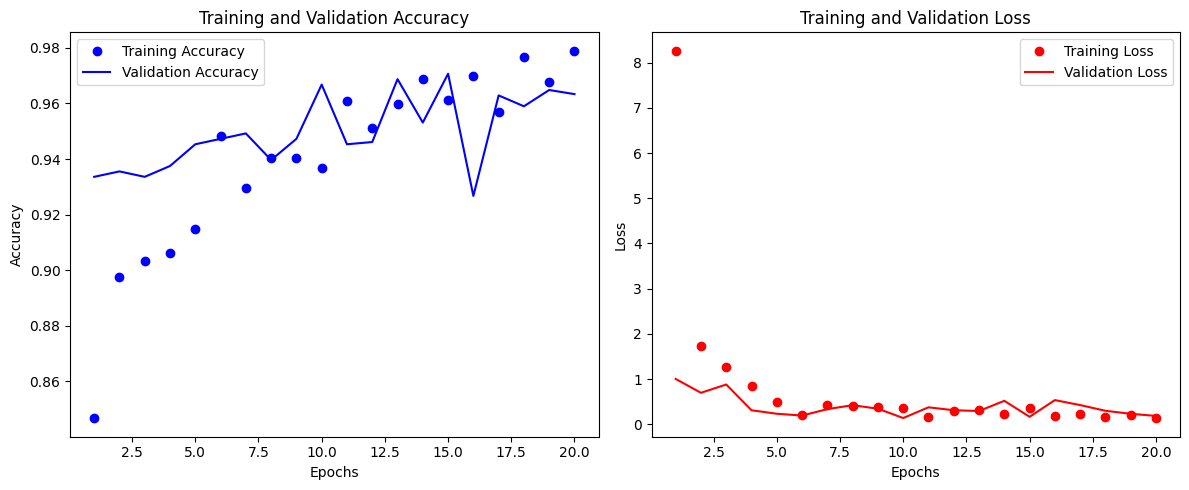

In [13]:
##visualize the model
import matplotlib.pyplot as plt

# Extract accuracy and loss history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


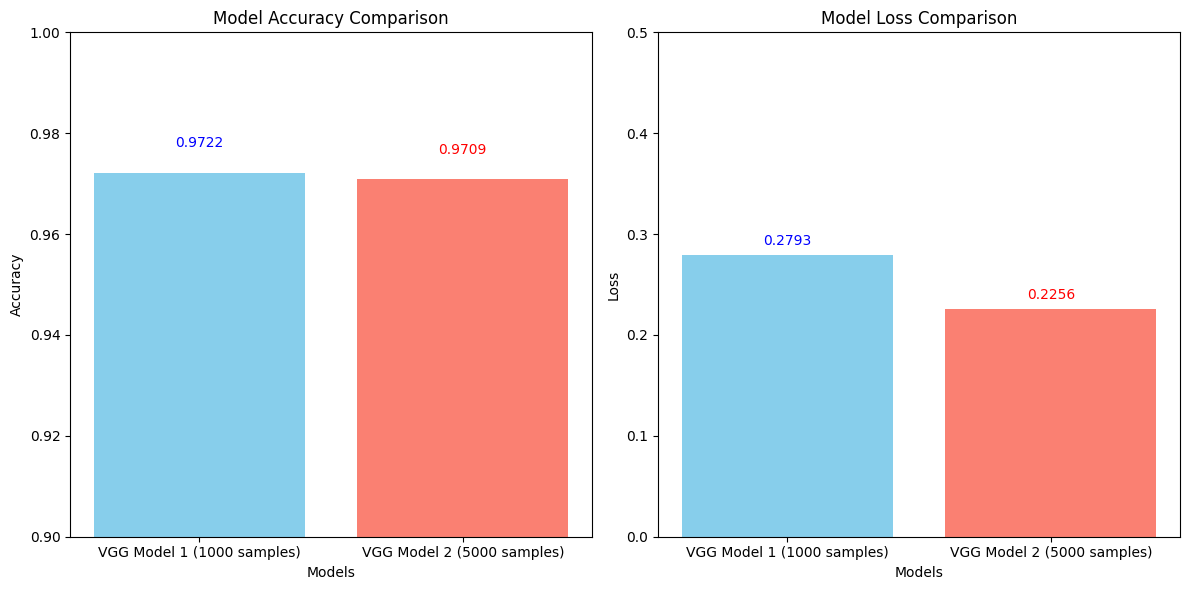

In [14]:
##Comparing two models
import matplotlib.pyplot as plt

# Model names
models = ['VGG Model 1 (1000 samples)', 'VGG Model 2 (5000 samples)']

# Accuracy and Loss
accuracy = [0.9722, 0.9709]
loss = [0.2793, 0.2256]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy Bar Plot
ax1.bar(models, accuracy, color=['skyblue', 'salmon'])
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylim(0.9, 1.0)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Models')
ax1.text(0, accuracy[0] + 0.005, f"{accuracy[0]:.4f}", ha='center', color='blue')
ax1.text(1, accuracy[1] + 0.005, f"{accuracy[1]:.4f}", ha='center', color='red')

# Loss Bar Plot
ax2.bar(models, loss, color=['skyblue', 'salmon'])
ax2.set_title('Model Loss Comparison')
ax2.set_ylim(0.0, 0.5)
ax2.set_ylabel('Loss')
ax2.set_xlabel('Models')
ax2.text(0, loss[0] + 0.01, f"{loss[0]:.4f}", ha='center', color='blue')
ax2.text(1, loss[1] + 0.01, f"{loss[1]:.4f}", ha='center', color='red')

plt.tight_layout()
plt.show()


###Conclusion: Model 1 has an accuracy of 0.9722 with a loss of 0.2793 (trained with 1000 samples).Model 2 has an accuracy of 0.9709 with a loss of 0.2256 (trained with 5000 samples). Both models perform well, achieving similar high accuracy on the validation set, with Model 1 slightly outperforming Model 2 in terms of accuracy.The difference in accuracy is minimal, indicating that adding more training samples (from 1000 to 5000) didn't significantly increase the model's accuracy. Model 2 has a lower loss value (0.2256) compared to Model 1 (0.2793). This suggests that Model 2 might be slightly better at predicting outputs with lower error, possibly due to the larger sample size.